### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

### Load tensorflow

In [0]:
import tensorflow as tf
tf.set_random_seed(42)

In [0]:
tf.__version__

'1.15.0'

### Collect Data

In [0]:
!pip install -U tensorflow==2.0 --quiet

     |████████████████████████████████| 86.3MB 30kB/s 
     |████████████████████████████████| 3.8MB 38.0MB/s 
     |████████████████████████████████| 450kB 55.5MB/s 
     |████████████████████████████████| 81kB 9.7MB/s 
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.7.0 which is incompatible.
ERROR: tensorboard 2.0.1 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.


In [0]:
import keras

Using TensorFlow backend.


In [0]:
(trainX, trainY), (testX, testY) = keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 2s 0us/step


In [0]:
print(testY[0:5])

[9 2 1 1 6]


In [0]:
trainX.shape

(60000, 28, 28)

In [0]:
testX.shape

(10000, 28, 28)

In [0]:
testY.shape

(10000,)

In [0]:
trainY.shape

(60000,)

In [0]:
testY[0]

9

### Convert both training and testing labels into one-hot vectors.

**Hint:** check **tf.keras.utils.to_categorical()**

In [0]:
trainY = tf.keras.utils.to_categorical(trainY, num_classes=10)
testY = tf.keras.utils.to_categorical(testY, num_classes=10)

In [0]:
testY[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [0]:
print(trainY.shape)
print('First 5 examples now are: ', trainY[0:5])

(60000, 10)
('First 5 examples now are: ', array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32))


### Visualize the data

Plot first 10 images in the triaining set and their labels.

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [0]:
import matplotlib.pyplot as plt

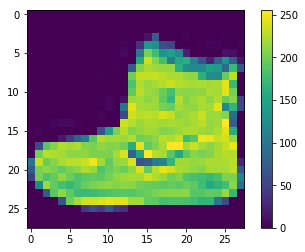

In [0]:
plt.figure()
plt.imshow(trainX[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
trainX = trainX / 255.0
testX = testX / 255.0

In [0]:
trainY

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [0]:
%matplotlib inline 

In [0]:
import numpy as np

In [0]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(10):
plt.subplot(5,5,i+1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(trainX[i], cmap=plt.cm.binary)
plt.xlabel(class_names[trainY[i]])
plt.show()

IndentationError: ignored

### Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

In [0]:
trainX.dtype

dtype('float64')

In [0]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

W1110 13:00:04.724555 139628989691776 deprecation.py:506] From /usr/local/lib/python2.7/dist-packages/tensorflow_core/python/ops/resource_variable_ops.py:1630: calling __init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
model.compile(optimizer='sgd', loss='categorical_crossentropy',
metrics=['accuracy'])

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


### Execute the model using model.fit()

In [0]:
model.fit(trainX,trainY,
validation_data=(testX,testY),
epochs=100,
batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 3s 46us/sample - loss: 0.8234 - acc: 0.7405 - val_loss: 0.6531 - val_acc: 0.7821
Epoch 2/100
60000/60000 [==============================] - 3s 42us/sample - loss: 0.5918 - acc: 0.8069 - val_loss: 0.5837 - val_acc: 0.8070
Epoch 3/100
60000/60000 [==============================] - 3s 43us/sample - loss: 0.5417 - acc: 0.8219 - val_loss: 0.5499 - val_acc: 0.8182
Epoch 4/100
60000/60000 [==============================] - 3s 42us/sample - loss: 0.5150 - acc: 0.8291 - val_loss: 0.5318 - val_acc: 0.8190
Epoch 5/100
60000/60000 [==============================] - 3s 43us/sample - loss: 0.4973 - acc: 0.8343 - val_loss: 0.5181 - val_acc: 0.8223
Epoch 6/100
60000/60000 [==============================] - 3s 42us/sample - loss: 0.4846 - acc: 0.8372 - val_loss: 0.5077 - val_acc: 0.8283
Epoch 7/100
60000/60000 [==============================] - 3s 43us/sample - loss: 0.4750 - acc: 0.8403 - val_l

### In the above Neural Network model add Batch Normalization layer after the input layer and repeat the steps.

In [0]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.compile(optimizer='sgd', loss='categorical_crossentropy',
metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                7850      
Total params: 10,986
Trainable params: 9,418
Non-trainable params: 1,568
_________________________________________________________________


### Execute the model

In [0]:
model.fit(trainX,trainY,
validation_data=(testX,testY),
epochs=100,
batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 4s 60us/sample - loss: 0.5963 - acc: 0.7922 - val_loss: 0.5044 - val_acc: 0.8239
Epoch 2/100
60000/60000 [==============================] - 4s 61us/sample - loss: 0.4870 - acc: 0.8314 - val_loss: 0.4784 - val_acc: 0.8343
Epoch 3/100
60000/60000 [==============================] - 4s 59us/sample - loss: 0.4678 - acc: 0.8364 - val_loss: 0.4771 - val_acc: 0.8339
Epoch 4/100
60000/60000 [==============================] - 4s 58us/sample - loss: 0.4562 - acc: 0.8411 - val_loss: 0.4725 - val_acc: 0.8362
Epoch 5/100
60000/60000 [==============================] - 4s 59us/sample - loss: 0.4475 - acc: 0.8460 - val_loss: 0.4637 - val_acc: 0.8403
Epoch 6/100
60000/60000 [==============================] - 3s 58us/sample - loss: 0.4438 - acc: 0.8463 - val_loss: 0.4577 - val_acc: 0.8414
Epoch 7/100
60000/60000 [==============================] - 3s 58us/sample - loss: 0.4383 - acc: 0.8474 - val_l

### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [0]:
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.001)
model.compile(optimizer='sgd', loss='categorical_crossentropy',
metrics=['accuracy'])

In [0]:
model.fit(trainX,trainY,
validation_data=(testX,testY),
epochs=100,
batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 4s 60us/sample - loss: 0.3975 - acc: 0.8594 - val_loss: 0.4664 - val_acc: 0.8434
Epoch 2/100
60000/60000 [==============================] - 4s 59us/sample - loss: 0.3953 - acc: 0.8590 - val_loss: 0.4693 - val_acc: 0.8385
Epoch 3/100
60000/60000 [==============================] - 4s 59us/sample - loss: 0.3957 - acc: 0.8595 - val_loss: 0.4649 - val_acc: 0.8429
Epoch 4/100
60000/60000 [==============================] - 3s 58us/sample - loss: 0.3949 - acc: 0.8611 - val_loss: 0.4728 - val_acc: 0.8402
Epoch 5/100
60000/60000 [==============================] - 4s 58us/sample - loss: 0.3962 - acc: 0.8596 - val_loss: 0.4688 - val_acc: 0.8391
Epoch 6/100
60000/60000 [==============================] - 4s 58us/sample - loss: 0.3976 - acc: 0.8594 - val_loss: 0.4691 - val_acc: 0.8406
Epoch 7/100
60000/60000 [==============================] - 4s 59us/sample - loss: 0.3960 - acc: 0.8595 - val_l

### Build the Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer. Use cross entropy loss function and singmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

In [0]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))
model.add(tf.keras.layers.BatchNormalization())


model.add(tf.keras.layers.Dense(100, activation ='sigmoid'))
model.add(tf.keras.layers.Dense(100, activation ='sigmoid'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.03)
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

## Review model

In [0]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_11 (Reshape)         (None, 784)               0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 784)               3136      
_________________________________________________________________
dense_23 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_24 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_25 (Dense)             (None, 10)                1010      
Total params: 92,746
Trainable params: 91,178
Non-trainable params: 1,568
_________________________________________________________________


### Run the model

In [0]:
model.fit(trainX,trainY,
validation_data=(testX,testY),
epochs=100,
batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 6s 92us/sample - loss: 0.9052 - acc: 0.7269 - val_loss: 0.7541 - val_acc: 0.7492
Epoch 2/100
60000/60000 [==============================] - 5s 89us/sample - loss: 0.7046 - acc: 0.7564 - val_loss: 0.6422 - val_acc: 0.7703
Epoch 3/100
60000/60000 [==============================] - 5s 89us/sample - loss: 0.6206 - acc: 0.7800 - val_loss: 0.5826 - val_acc: 0.7905
Epoch 4/100
60000/60000 [==============================] - 5s 89us/sample - loss: 0.5705 - acc: 0.7982 - val_loss: 0.5431 - val_acc: 0.8069
Epoch 5/100
60000/60000 [==============================] - 5s 89us/sample - loss: 0.5334 - acc: 0.8123 - val_loss: 0.5142 - val_acc: 0.8164
Epoch 6/100
60000/60000 [==============================] - 5s 90us/sample - loss: 0.5072 - acc: 0.8193 - val_loss: 0.4941 - val_acc: 0.8245
Epoch 7/100
60000/60000 [==============================] - 5s 90us/sample - loss: 0.4859 - acc: 0.8281 - val_l